# Lab 2: Mine Crafting

In [1]:
# Important Constants and Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

G = 6.6743e-11 # m^3 kg^-1 s^-2
g0 = 9.81 # m s^-2
mE = 5.972e24 # kg
mM = 7.35e22 # kg
rE = 6378.1e3 # m
rM = 1738.1e3 # m
omegaE = 7.272e-5 # rad s^-1
m_test = 1 # kg

## Part 1: The Ideal Case

The predicted fall time from the simple equation is 28.55686245854129 s.
The reduced system of differential equations is y' = v and v' = -g - alpha v^gamma
The numerically calculated fall time is 28.556862458541286 s.


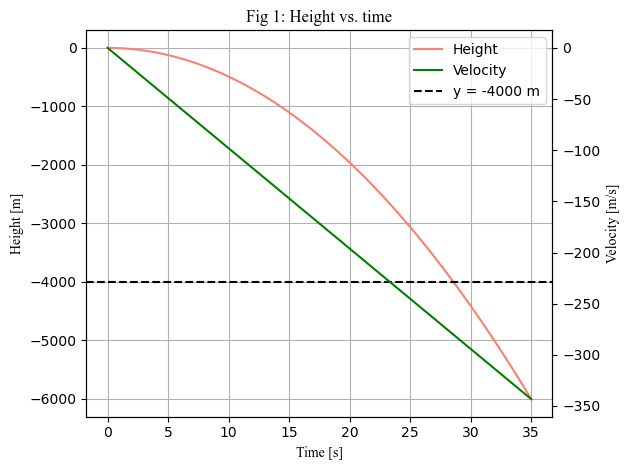

In [2]:
alpha = 0 # drag coefficient is zero
gamma = 2 # scales with square of velocity
t_predicted = np.sqrt(2*4000/g0)
print(f'The predicted fall time from the simple equation is {float(t_predicted)} s.')
print(f"The reduced system of differential equations is y' = v and v' = -g - alpha v^gamma")

def diff(t, s):
    y = s[0]
    v = s[1]

    dydt = v
    dvdt = -g0 - alpha*v**gamma

    return [dydt, dvdt]

def event(t, s):
    return s[0] + 4000

#event.terminal = True

t0, tf = 0, 35
n = 1000
time_eval = np.linspace(t0, tf, n)
ics = [0, 0]

soln = solve_ivp(fun = diff, t_span = (t0, tf), y0 = ics, t_eval = time_eval, dense_output = True, events = event)

fig, ax = plt.subplots()
ax.plot(soln.t, soln.y[0], color = 'salmon', label = 'Height')
ax.plot([],[], color = 'green', label = 'Velocity')
ax.axhline(-4000, linestyle = '--', color = 'black', label = 'y = -4000 m')
ax.set_xlabel('Time [s]', fontname = 'Times New Roman')
ax.set_ylabel('Height [m]',fontname = 'Times New Roman')
ax.set_title('Fig 1: Height vs. time', fontname = 'Times New Roman')
ax2 = ax.twinx()
ax2.plot(soln.t, soln.y[1], color = 'green', label = 'Velocity')
ax2.set_ylabel('Velocity [m/s]', fontname = 'Times New Roman')
ax.legend()
plt.tight_layout()
ax.grid()

bottom = soln.t_events[0][0]
print(f'The numerically calculated fall time is {bottom} s.')

Because both the simple equation and analytic solution consider a quadratic equation with no drag, their results are nearly identical.

## Part 2: Including Drag and Variable g

The numerically calculated fall time is 28.5583551141743 s.


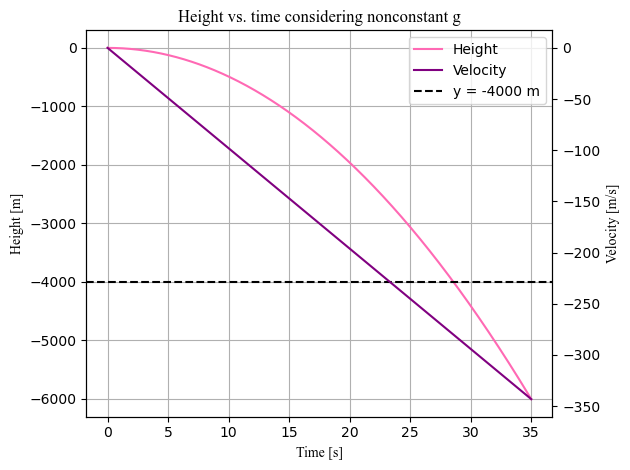

In [3]:
def g(r):
    return g0*(r/rE)

def diff_g(t, s):
    y = s[0]
    v = s[1]

    dydt = v
    dvdt = -g(rE + y) - alpha*v**gamma

    return [dydt, dvdt]

def event_g(t, s):
    return s[0] + 4000

t0, tf = 0, 35
n = 1000
time_eval = np.linspace(t0, tf, n)
ics = [0, 0]

soln2 = solve_ivp(fun = diff_g, t_span = (t0, tf), y0 = ics, t_eval = time_eval, dense_output = True, events = event_g)

fig, ax = plt.subplots()
ax.plot(soln2.t, soln2.y[0], color = 'hotpink', label = 'Height')
ax.plot([],[], color = 'purple', label = 'Velocity')
ax.axhline(-4000, linestyle = '--', color = 'black', label = 'y = -4000 m')
ax.set_xlabel('Time [s]', fontname = 'Times New Roman')
ax.set_ylabel('Height [m]',fontname = 'Times New Roman')
ax.set_title('Fig. 2: Height vs. time considering nonconstant g', fontname = 'Times New Roman')
ax2 = ax.twinx()
ax2.plot(soln2.t, soln2.y[1], color = 'purple', label = 'Velocity')
ax2.set_ylabel('Velocity [m/s]', fontname = 'Times New Roman')
ax.legend()
plt.tight_layout()
ax.grid()

bottom_g = soln2.t_events[0][0]
print(f'The numerically calculated fall time is {bottom_g} s.')

percent_change = (bottom_g - bottom)/bottom*100

The numerically calculated fall time with non constant g is 28.5583551141743 s, compared to a value of 28.55686245854129 s for constant g. It makes sense that the time would increase, as gravity is decreasing as the object gets closer to the earth. However, this change is negligible in practice, as the change is only 0.005 %.

The numerically calculated fall time is 84.27796653906074 s.


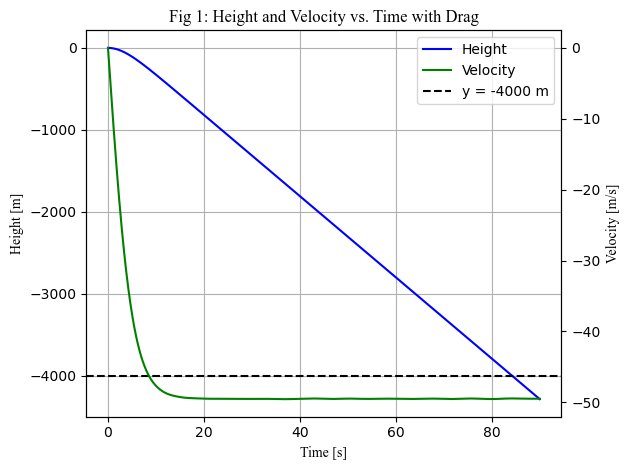

In [4]:
alpha = -.004 # drag coefficient is zero
gamma = 2 # scales with square of velocity

def diff_drag(t, s):
    y = s[0]
    v = s[1]

    dydt = v
    dvdt = -g(rE + y) - alpha*v**gamma

    return [dydt, dvdt]

def event_drag(t, s):
    return s[0] + 4000


t0, tf = 0, 90
n = 1000
time_eval = np.linspace(t0, tf, n)
ics = [0, 0]

soln3 = solve_ivp(fun = diff_drag, t_span = (t0, tf), y0 = ics, t_eval = time_eval, dense_output = True, events = event_drag)
#print(soln3)

fig, ax = plt.subplots()
ax.plot(soln3.t, soln3.y[0], color = 'blue', label = 'Height')
ax.plot([],[], color = 'green', label = 'Velocity')
ax.axhline(-4000, linestyle = '--', color = 'black', label = 'y = -4000 m')
ax.set_xlabel('Time [s]', fontname = 'Times New Roman')
ax.set_ylabel('Height [m]',fontname = 'Times New Roman')
ax.set_title('Fig 1: Height and Velocity vs. Time with Drag', fontname = 'Times New Roman')
ax2 = ax.twinx()
ax2.plot(soln3.t, soln3.y[1], color = 'green', label = 'Velocity')
ax2.set_ylabel('Velocity [m/s]', fontname = 'Times New Roman')
ax.legend()
plt.tight_layout()
ax.grid()
bottom_drag = soln3.t_events[0][0]
print(f'The numerically calculated fall time is {bottom_drag} s.')

Including drag significantly increases fall time, increasing it by more than a factor of 3. This is because a force opposing the object's motion will hinder its acceleration, causing it to fall less rapidly.

## Part 3: The Coriolis Force

The object hits the side at t = 29.63574281893897 s.
The object hits the bottom at t = 84.27832883054629 s.
Once the object is at the bottom, it has drifted 24.305648176054618 m


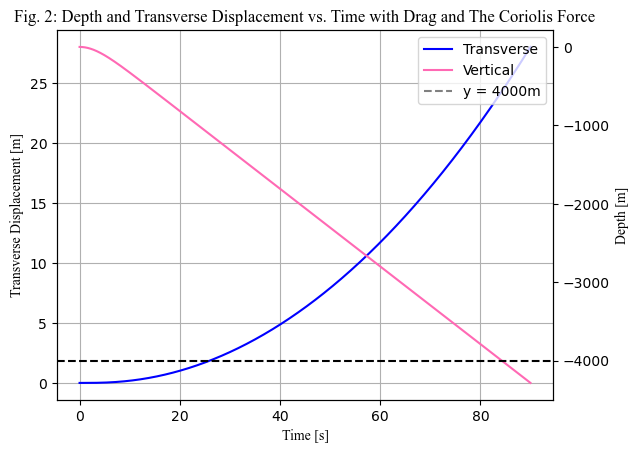

In [5]:
def coriolis_pos(t, s):
    d_vec = s[0:3]
    v = s[3:6]

    x = d_vec[0]
    y = d_vec[1]
    z = d_vec[2]

    dxdt = v[0]
    dydt = v[1]
    dzdt = v[2]

    dvxdt = alpha * dxdt ** gamma + (2 * omegaE / m_test) * dzdt
    dvydt = alpha * dydt ** gamma
    dvzdt = -g(rE + z) - alpha * dzdt ** gamma  - (2 * omegaE / m_test) * dxdt  # z down into the mine shaft
    
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]

def side(t, s):
    d = np.sqrt(s[0] ** 2 + s[1] ** 2) - 2.5
    return d

def bottom(t, s):
    return s[2] + 4000

t0, tf = 0, 90
n = 1000
time_eval = np.linspace(t0, tf, n)
ics = [0, 0, 0, 0, 0, 0]

soln4 = solve_ivp(fun = coriolis_pos, t_span = (t0, tf), y0 = ics, t_eval = time_eval, dense_output = True, events = [side, bottom])

time = soln4.t
transverse = np.sqrt(soln4.y[0] ** 2 + soln4.y[1] ** 2)
depth = soln4.y[2]

fig, ax = plt.subplots()
ax.plot(time, transverse, '-', color = 'blue', label = 'Transverse')
ax2 = ax.twinx()
ax2.plot(time, depth, '-', color = 'hotpink', label = 'Depth')
ax.plot([], [], '-', color = 'hotpink', label = 'Vertical')
ax.plot([], [], '--', color = 'grey', label = 'y = 4000m')
ax.set_xlabel('Time [s]', fontname = 'Times New Roman')
ax2.set_ylabel('Depth [m]', fontname = 'Times New Roman')
ax.set_ylabel('Transverse Displacement [m]', fontname = 'Times New Roman')
ax.set_title('Fig. 2: Depth and Transverse Displacement vs. Time with Drag and The Coriolis Force', fontname = 'Times New Roman')
ax.legend(loc = 'upper right')
ax2.axhline(-4000, linestyle = '--', color = 'black', label = 'y = -4000 m')
ax.grid()

print(f'The object hits the side at t = {soln4.t_events[0][0]} s.')
print(f'The object hits the bottom at t = {soln4.t_events[1][0]} s.')
print(f'Once the object is at the bottom, it has drifted {-soln4.sol(soln4.t_events[1][0])[0]} m')

Without drag, the object hits the side at t = 21.907114685071463 s.
Without drag, the object hits the bottom at t = 28.558375645275184 s.


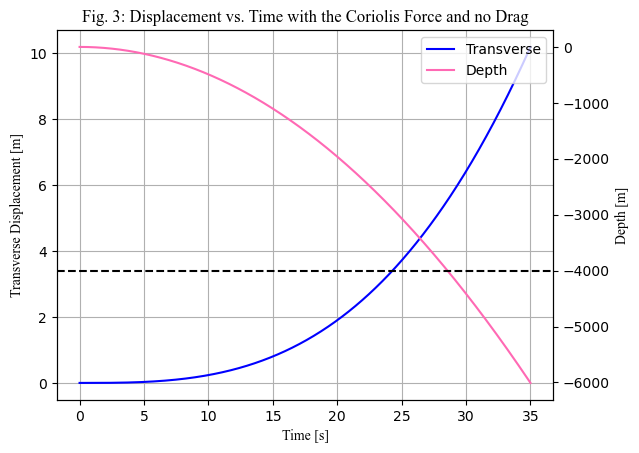

In [6]:
# Considering the coriolis force without drag
def coriolis_pos(t, s):
    d_vec = s[0:3]
    v = s[3:6]

    x = d_vec[0]
    y = d_vec[1]
    z = d_vec[2]

    dxdt = v[0]
    dydt = v[1]
    dzdt = v[2]

    dvxdt = (2 * omegaE / m_test) * dzdt
    dvydt = 0
    dvzdt = -g(rE + z) - (2 * omegaE / m_test) * dxdt  # z down into the mine shaft
    
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]

def side(t, s):
    d = np.sqrt(s[0] ** 2 + s[1] ** 2) - 2.5
    return d

def bottom(t, s):
    return s[2] + 4000

t0, tf = 0, 35
n = 1000
time_eval = np.linspace(t0, tf, n)
ics = [0, 0, 0, 0, 0, 0]

soln_coriolis = solve_ivp(fun = coriolis_pos, t_span = (t0, tf), y0 = ics, t_eval = time_eval, dense_output = True, events = [side, bottom])

time = soln_coriolis.t
transverse = np.sqrt(soln_coriolis.y[0] ** 2 + soln4.y[1] ** 2)
depth = soln_coriolis.y[2]

fig, ax = plt.subplots()
ax.plot(time, transverse, '-', color = 'blue', label = 'Transverse')
ax2 = ax.twinx()
ax2.plot(time, depth, '-', color = 'hotpink', label = 'Depth')
ax.plot([], [], '-', color = 'hotpink', label = 'Depth')
ax.set_xlabel('Time [s]', fontname = 'Times New Roman')
ax2.set_ylabel('Depth [m]', fontname = 'Times New Roman')
ax.set_ylabel('Transverse Displacement [m]', fontname = 'Times New Roman')
ax.set_title('Fig. 3: Displacement vs. Time with the Coriolis Force and no Drag', fontname = 'Times New Roman')
ax.legend(loc = 'upper right')
ax2.axhline(-4000, linestyle = '--', color = 'black', label = 'y = -4000 m')
ax.grid()

print(f'Without drag, the object hits the side at t = {soln_coriolis.t_events[0][0]} s.')
print(f'Without drag, the object hits the bottom at t = {soln_coriolis.t_events[1][0]} s.')

Assuming a 5 meter wide shaft with air resistance, it will not hit the bottom before colliding with the side. It will have drifted 2.5 m at t = 29.63574281893897 s, long before hitting the bottom at after 84 s. Drag makes a major difference here, but even without drag the object still hits the side before reaching the bottom. When neglectign drag, the object hits the side at t = 21.907114685071463 s, which is still before it hits the bottom at t = 28.5583551141743 s.

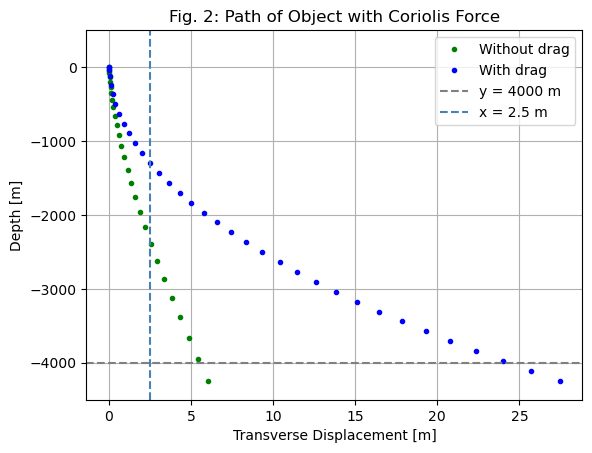

In [7]:
fig, ax = plt.subplots()
transverse = np.sqrt(soln_coriolis.y[0] ** 2 + soln4.y[1] ** 2)

transverse2 = np.sqrt(soln4.y[0] ** 2 + soln4.y[1] ** 2)
depth2 = soln4.y[2]

depth = soln_coriolis.y[2]
ax.plot(transverse[::30], depth[::30], color = 'green', marker = 'o', linestyle = '', markersize = '3', label = 'Without drag')
ax.plot(transverse2[::30], depth2[::30], color = 'blue', marker = 'o', linestyle = '', markersize = '3', label = 'With drag')

#ax.plot(transverse, depth, color = 'green', linestyle = '-', label = 'Without drag')
#ax.plot(transverse2, depth2, color = 'blue', linestyle = '-', label = 'With drag')

ax.set_xlabel('Transverse Displacement [m]')
ax.axhline(y = -4000, linestyle = '--', color = 'grey', label = 'y = 4000 m')
ax.axvline(x = 2.5, linestyle = '--', color = 'steelblue', label = 'x = 2.5 m')
ax.set_title('Fig. 3: Path of Object with Coriolis Force')
ax.set_ylabel('Depth [m]')
ax.set_ylim(-4500, 500)
ax.legend()
ax.grid()

## Part 4: An infinitely deep mine

The object first reaches the center of the Earth at 1266.4734695588027 s at a speed of -7910.759872777072 m/s
The object first reaches the other side of the Earth at 2532.6120147256643 s
Orbital period is T = 5069.371199675785 s


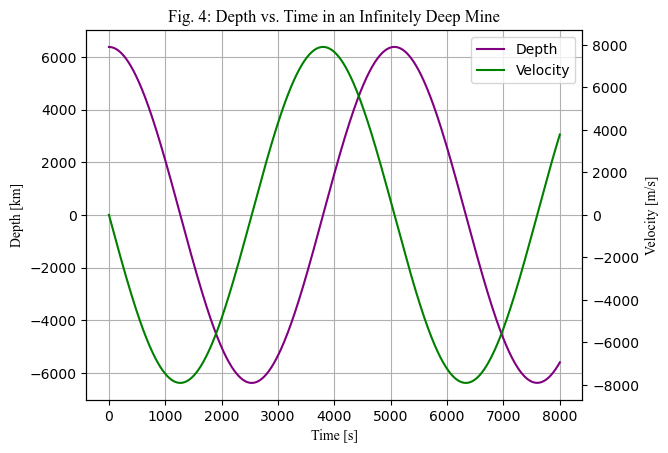

In [8]:
def diff(t, s):
    r = s[0]
    v = s[1]

    drdt = v
    dvdt = -g(r)

    return [drdt, dvdt]

def center(t, s):
    return s[0]

def other_side(t, s):
    return s[1]

t0, tf = 0, 8000
n = 1000
time_eval = np.linspace(t0, tf, n)
ics = [rE, 0]

soln5 = solve_ivp(fun = diff, t_span = (t0, tf), y0 = ics, t_eval = time_eval, events = [center, other_side], dense_output = True)

time = soln5.t
depth = soln5.y[0]/1000 # converting to km

fig, ax = plt.subplots()
ax.plot(time, depth, color = 'purple', label = 'Depth')
ax.plot([], [], color = 'green', label = 'Velocity')
ax.set_xlabel('Time [s]', fontname = "Times New Roman")
ax.set_ylabel('Depth [km]', fontname = "Times New Roman")
ax.set_title('Fig. 4: Depth vs. Time in an Infinitely Deep Mine', fontname = "Times New Roman")
ax.legend()

ax2 = ax.twinx()
ax2.plot(soln5.t, soln5.y[1], color = 'green', label = 'Velocity')
ax2.set_ylabel('Velocity [m/s]', fontname = "Times New Roman")
ax.grid()

print(f'The object first reaches the center of the Earth at {soln5.t_events[0][0]} s at a speed of {soln5.y_events[0][0][1]} m/s')
print(f'The object first reaches the other side of the Earth at {soln5.t_events[1][1]} s')

orbit_v = np.sqrt(G * mE / (rE))
# angular_v = orbit_v / rE
period = (2 * np.pi * rE) / orbit_v
print(f'Orbital period is T = {period} s')

The 'crossing' time of 2532.6120147256643 s is very close to one half of the orbital period: 
$$T = 5069.371199675785 \; s = 2 \times 2534.6855998378924 \; s$$

## Part 5: A Non-Uniform Earth

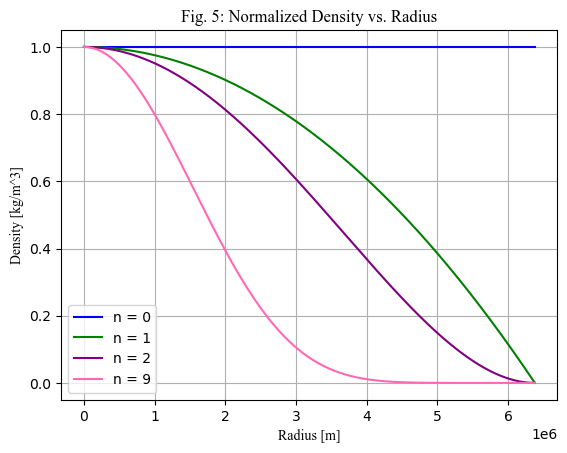

In [9]:
def density(n, rho_n, depth):
    return rho_n * (1 - (depth/rE) ** 2) ** n

def rho_n(n):
    integrate = lambda depth, m: (1 - (depth/rE) ** 2) ** m * (depth/rE) ** 2
    integral = quad(integrate, 0, rE, args = (n))[0]
    rho_n = mE / (4 * np.pi * integral)
    return rho_n
    
rho_n = np.vectorize(rho_n)

ns = np.array([0, 1, 2, 9])
rho_constants = rho_n(ns)
rs = np.linspace(0, rE, 1000)

rho_funcs, rho_vals, rho_normal_vals = [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]

for i in range(len(ns)):
    rho_funcs[i] = lambda r, ns_i = ns[i], rho_constant = rho_constants[i] : density(ns_i, rho_constant, r)
for i in range (len(ns)):
    rho_vals_i = rho_funcs[i](rs)
for i in range(len(ns)):
    rho_normal_func = lambda r, rho_c = 1, ns_i = ns[i], : density(ns_i, rho_c, r)
    rho_normal_vals[i] = rho_normal_func(rs)

fig, ax = plt.subplots()
ax.plot(rs, rho_normal_vals[0], '-', color = 'blue', label = 'n = 0')
ax.plot(rs, rho_normal_vals[1], '-', color = 'green', label = 'n = 1')
ax.plot(rs, rho_normal_vals[2], '-', color = 'purple', label = 'n = 2')
ax.plot(rs, rho_normal_vals[3], '-', color = 'hotpink', label = 'n = 9')
ax.set_xlabel('Radius [m]', fontname = 'Times New Roman')
ax.set_ylabel('Density [kg/m^3]', fontname = 'Times New Roman')
ax.set_title('Fig. 5: Normalized Density vs. Radius', fontname = 'Times New Roman')
ax.legend(loc = 'lower left')
ax.grid()

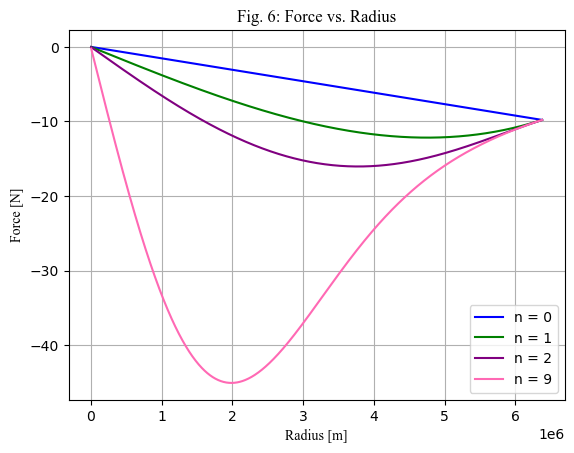

In [10]:
def force(r, dense):
    if r == 0:
        return np.nan
    else:
        integrate = lambda a : dense(a) * (a/rE) ** 2
        mass = 4 * np.pi * quad(integrate, 0, r)[0]
        force = -(G * mass * m_test) / (r ** 2)
        return force

force = np.vectorize(force)

F_funcs, Fs= [0, 0, 0, 0], [0, 0, 0, 0]

for i in range(len(F_funcs)):
    F_funcs[i] = lambda r, func = rho_funcs[i] : force(r, func)
    
for i in range(len(Fs)):
    Fs[i] = F_funcs[i](rs)

fig, ax = plt.subplots()
ax.plot(rs, Fs[0], '-', color = 'blue', label = 'n = 0')
ax.plot(rs, Fs[1], '-', color = 'green', label = 'n = 1')
ax.plot(rs, Fs[2], '-', color = 'purple', label = 'n = 2')
ax.plot(rs, Fs[3], '-', color = 'hotpink', label = 'n = 9')
ax.set_xlabel('Radius [m]', fontname = 'Times New Roman')
ax.set_ylabel('Force [N]', fontname = 'Times New Roman')
ax.set_title('Fig. 6: Force vs. Radius', fontname = 'Times New Roman')
ax.legend(loc = 'lower right')
ax.grid()

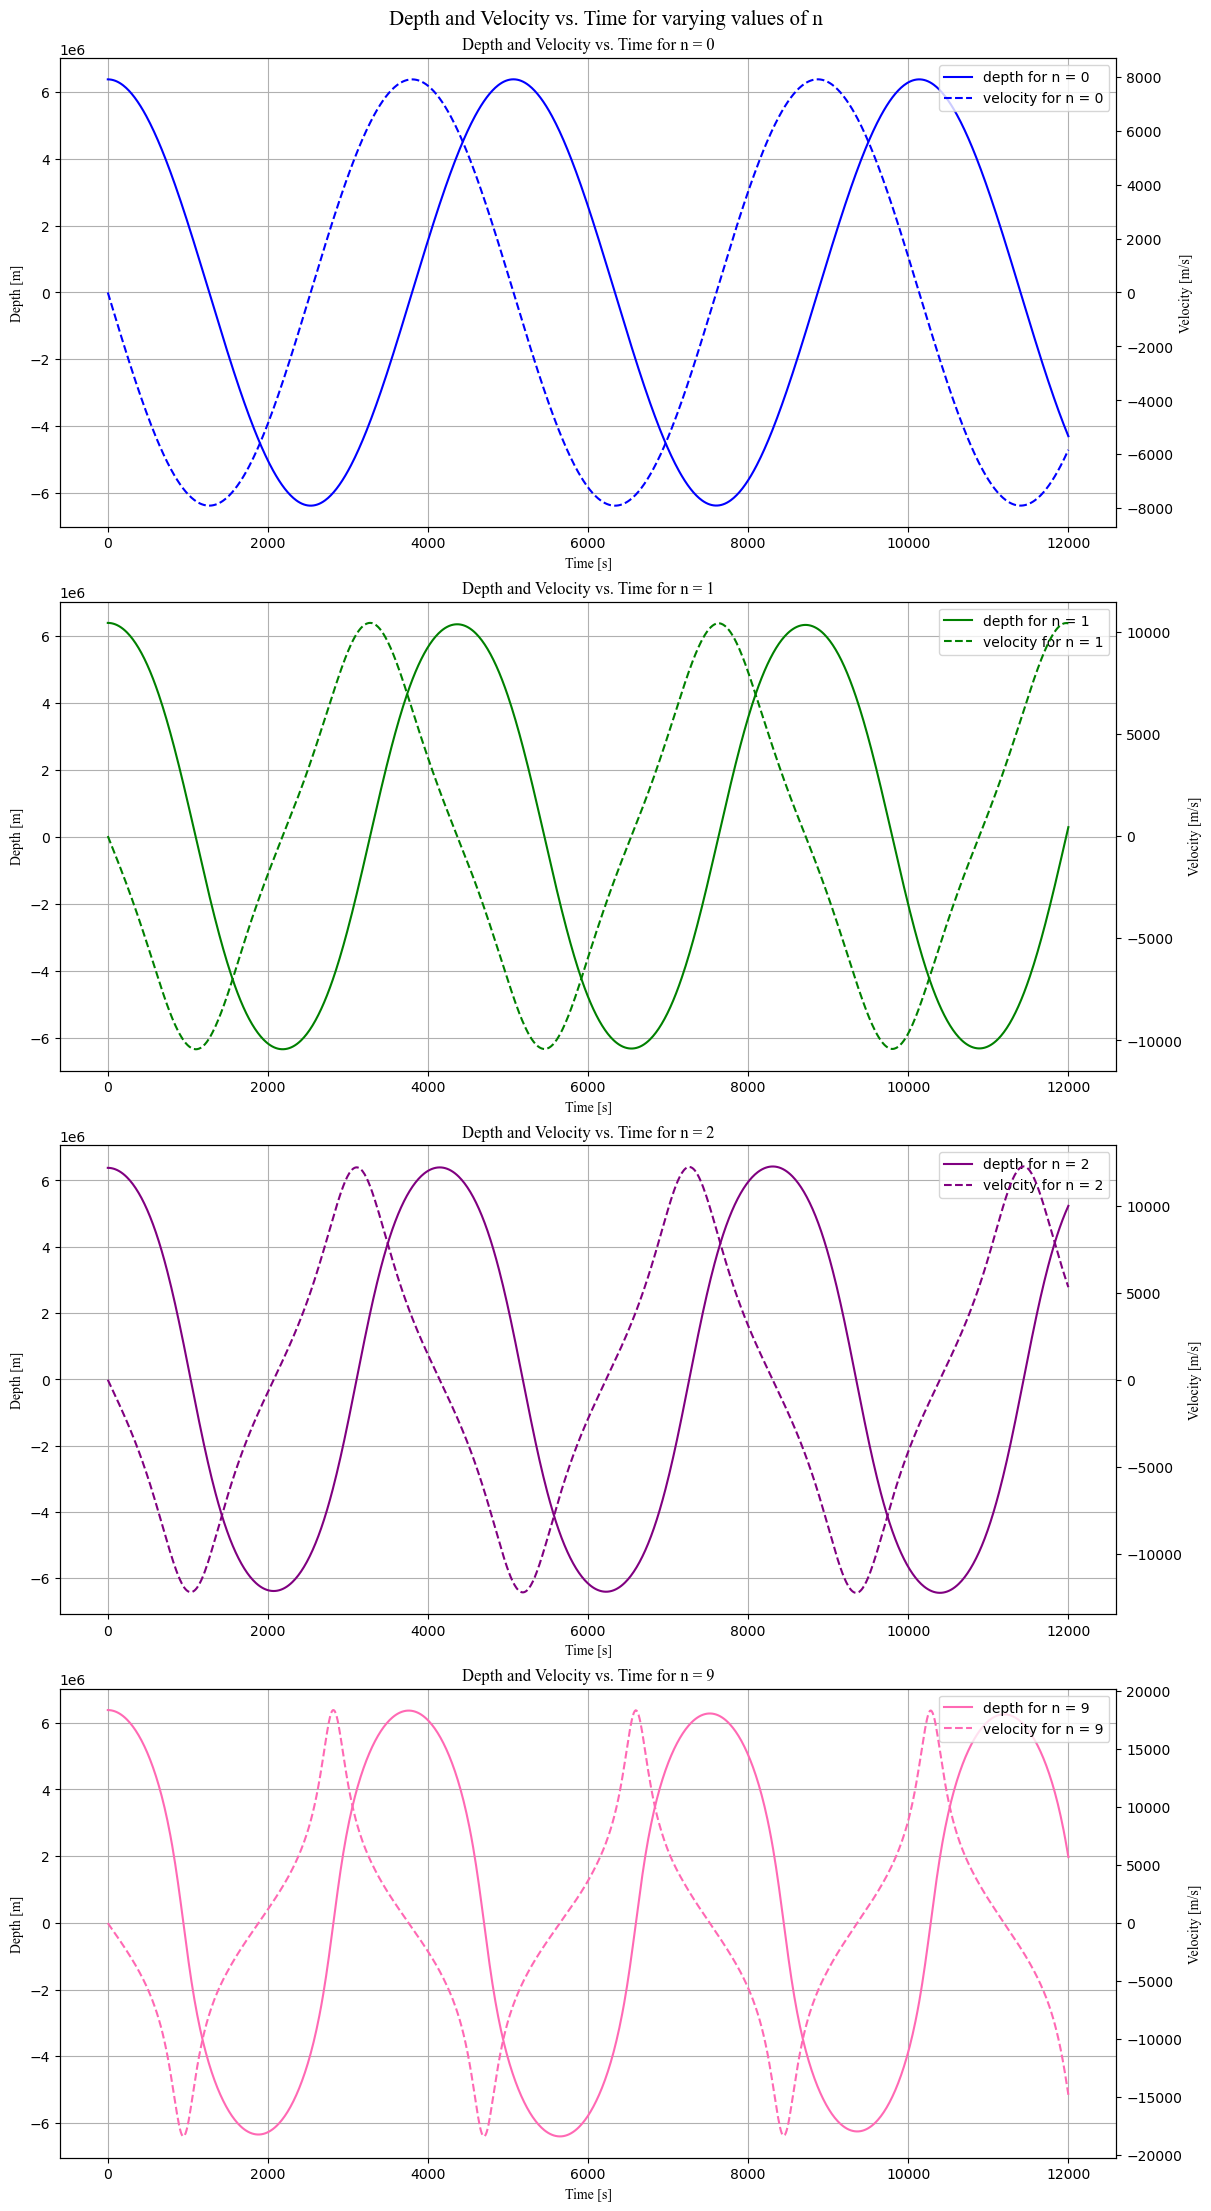

In [14]:
def solve_freefall(force_func):
    def weird_force(t, s):
        y = s[0]
        v = s[1]
    
        dydt = v
        dvdt = force_func(y)/m_test
    
        return [dydt, dvdt]
 
    def middle(t, s):
        return s[0]

    def side(t,s):
        return s[1]
    middle.terminal = False
    
    t0, tf = 0, 12000
    n = 1000
    times = np.linspace(t0, tf, n)

    ics = [rE, 0]

    soln = solve_ivp(fun = weird_force, t_span = (t0, tf), y0 = ics, t_eval = times, dense_output = True, events = [middle, side])
    #print(soln)
    return soln

solns = [0, 0, 0, 0]

for i in range(len(solns)):
    solns[i] = solve_freefall(F_funcs[i])

fig, ax = plt.subplots(4, 1, figsize = (12,22), constrained_layout = True)
fig.suptitle('Fig 7: Depth and Velocity vs. Time for varying values of n', fontname = 'Times New Roman', fontsize = 15)
colors = ['blue', 'green', 'purple', 'hotpink']
ax2 = [0, 0, 0, 0]
for i in range(len(ax)):
    ax[i].plot(solns[i].t, solns[i].y[0], '-', color = colors[i], label = f'depth for n = {ns[i]}')
    ax[i].plot([], [], '--', color = colors[i], label = f'velocity for n = {ns[i]}')
    ax[i].set_xlabel('Time [s]', fontname = 'Times New Roman')
    ax[i].set_ylabel('Depth [m]', fontname = 'Times New Roman')
    ax[i].set_title(f'Depth and Velocity vs. Time for n = {ns[i]}', fontname = 'Times New Roman')
    ax[i].legend(loc = 'upper right')
    ax[i].grid()

    ax2[i] = ax[i].twinx()
    ax2[i].plot(solns[i].t, solns[i].y[1], '--', color = colors[i], label = f'v for n = {ns[i]}')
    ax2[i].set_ylabel('Velocity [m/s]', fontname = 'Times New Roman')


In [17]:
for i in range(len(solns)):
    print(f'The time for the object to reach the center for n = {ns[i]} is t = {solns[i].t_events[0][0]} s')
    print(f'The velocity at the center of the Earth for n = {ns[i]} is v = {solns[i].sol(solns[i].t_events[0][0])[1]} m/s.\n')

for i in range(len(solns)):
    print(f'The crossing time for n = {ns[i]} is t = {solns[i].t_events[1][1]} s')

The time for the object to reach the center for n = 0 is t = 1267.2409534601463 s
The velocity at the center of the Earth for n = 0 is v = -7905.971248072989 m/s.

The time for the object to reach the center for n = 1 is t = 1096.8914820025386 s
The velocity at the center of the Earth for n = 1 is v = -10435.238778035073 m/s.

The time for the object to reach the center for n = 2 is t = 1035.1387754254788 s
The velocity at the center of the Earth for n = 2 is v = -12200.745609087304 m/s.

The time for the object to reach the center for n = 9 is t = 943.8748065601543 s
The velocity at the center of the Earth for n = 9 is v = -18391.996831519344 m/s.

The crossing time for n = 0 is t = 2534.1464907315953 s
The crossing time for n = 1 is t = 2184.7689899453085 s
The crossing time for n = 2 is t = 2072.3721602475102 s
The crossing time for n = 9 is t = 1881.5358989918484 s


## Part 6: A Lunar Mine Shaft

In [13]:
a_moon = G * mM / (rM ** 2)

def g_moon(r):
    return a_moon * (r / rM)

def moon_derivs(t, s):
    y = s[0]
    v = s[1]

    dydt = v
    dvdt = -g_moon(y)
    return [dydt, dvdt]
def moon_event(t, s):
    return s[0]

t0, tf = 0, 5000
n = 1000
times = np.linspace(t0, tf, n)

ics = [rM, 0]

moon_soln = solve_ivp(fun = moon_derivs, t_span = (t0, tf), y0 = ics, t_eval = times, dense_output = True, events = moon_event)

moon_time = moon_soln.t_events[0][0]

print(f'The object reaches the other side of the moon at t = {2*moon_time} s')
print(f'This implies an orbital period of {moon_time * 4}\n')

moon_rho = mM / ((4/3) * np.pi * rM ** 3)
earth_rho = mE / ((4/3) * np.pi * rE ** 3)
ratio = moon_rho / earth_rho
factor = 1/np.sqrt(ratio)

print(f'The density of the earth is {earth_rho} kg/m^3')
print(f'The density of the moon is {moon_rho} kg/m^3\n')
print(f'The ratio of the density of the Earth to the density of the Moon is {1/ratio}')
print(f'The ratio of the crossing time of the Earth to the crossing time of the Moon is {2532.6120147256643/(2*moon_time)}')
print(f'The inverse of the square root of the ratio of the density of Earth to density of the moon is {np.sqrt(ratio)}')



The object reaches the other side of the moon at t = 3249.8119839472934 s
This implies an orbital period of 6499.623967894587

The density of the earth is 5494.867409551201 kg/m^3
The density of the moon is 3341.7538038703183 kg/m^3

The ratio of the density of the Earth to the density of the Moon is 1.6443064726034609
The ratio of the crossing time of the Earth to the crossing time of the Moon is 0.7793103192540689
The inverse of the square root of the ratio of the density of Earth to density of the moon is 0.7798455832735046


The orbital period is proportional given as $T = \sqrt{\frac{G \pi r^3}{GM}} = \sqrt{\frac{4}{3 G \rho}}$

Thus, $T \propto \frac{1}{\sqrt{\rho}}$

And hence: $\frac{t_E}{t_M} = \sqrt{\frac{\rho_M}{\rho_E}}$

This holds true in that: $\sqrt{\frac{\rho_M}{\rho_E}} = \frac{t_E}{t_M} = \sqrt{\frac{1}{1.64}}  = \frac{2534.1 \; s}{3249.8 \; s} \approx 0.78$